# NLP - Project 2
## Rinehart Analysis with Word Vectors
**Team**: *Jean Merlet, Konstantinos Georgiou, Matt Lane*

## Where to put the code
- Place the preprocessing functions/classes in [nlp_libs/books/preprocessing.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/preprocessing.py)
- The custom word embeddings functions/classes (task 1) in [nlp_libs/books/word_embeddings.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/word_embeddings.py) (separate class)
- The pretrained word embeddings functions/classes (task 2) in [nlp_libs/books/word_embeddings.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/word_embeddings.py) (separate class)
- The functions/classes (if any) that compare the results (tasks 3, 4, 5) in [nlp_libs/books/compare_statistics.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/compare_statistics.py)
- Any plotting related functions in [nlp_libs/books/plotter.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/plotter.py)

**The code is reloaded automatically. Any class object needs to reinitialized though.** 

## Config file
The yml/config file is located at: [confs/proj_2.yml](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/confs/proj_2.yml)<br>
To load it run:
```python
config_path='confs/proj_2.yml'
conf = Configuration(config_src=config_path)
# Get the books dictionary
books = conf.get_config('data_loader')['config']['books'] # type = Dict
print(books.keys())
print(books['The_Bat'])
```
To reload the config just run the 2nd and 3rd command.

## Libraries Overview:
All the libraries are located under *"\<project root>/nlp_libs"*
- nlp_libs/**books**: This project's code (imported later)
- nlp_libs/**configuration**: Class that creates config objects from yml files
- nlp_libs/**fancy_logger**: Logger that can be used instead of prints for text formatting (color, bold, underline etc)

## Project 1 Code
If you need to import anything from Project 1 just run:
```python
import proj1_nlp_libs.books.processed_book as proc
import proj1_nlp_libs.books.book_extractor as extr
import proj1_nlp_libs.books.plotter as pl
```

## For more info check out:
- the **[Project Board](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/projects/1)**
- the **[README](https://github.com/NLPaladins/https://github.com/NLPaladins/rinehartAnalysis_wordVectors/blob/main/README.md)**
- and the **[Current Issues](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/issues)**

# ------------------------------------------------------------------

## On Google Collab?
- **If yes, run the two cells and press the two buttons below:**
- Otherwise go to "***Import the base Libraries***"

In [56]:
# Import Jupyter Widgets
import os
from itertools import combinations
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/NLPaladins/rinehartAnalysis_wordVectors.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

In [18]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/rinehartAnalysis')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
        print("\nInstalling Requirements")
        !pip install -r requirements.txt
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

### To commit and push Google Collab notebook to Github
Click **File > Save a copy on Gihtub**

# ------------------------------------------------------------------

# Initializations

## Import the base Libraries

In [37]:
# Imports
%load_ext autoreload
%autoreload 2
from importlib import reload as reload_lib
from typing import *
import os
import re
from pprint import pprint
# Numpy
import numpy as np

# Import preprocessing lib
from nlp_libs.books import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the YML file

In [38]:
from nlp_libs import Configuration

In [39]:
# The path of configuration and log save path
config_path = "confs/proj_2.yml"
# !cat "$config_path"
# Load the configuration
conf = Configuration(config_src=config_path)
# Get the books dict
books = conf.get_config('data_loader')['config']['books']
# print(books.keys())
# pprint(books)  # Pretty print the books dict

2021-10-31 19:01:58 Config       INFO     Configuration file loaded successfully from path: /Users/96v/Documents/DSE/nlp/rinehartAnalysis_wordVectors/confs/proj_2.yml
2021-10-31 19:01:58 Config       INFO     Configuration Tag: proj2


## Setup Logger and Example

In [40]:
log_path = "logs/proj_2.log"
# Load and setup logger
logger = ColorizedLogger(logger_name='Notebook', color='cyan')
ColorizedLogger.setup_logger(log_path=log_path, debug=False, clear_log=True)
# Examples
logger.info("Logger Examples:")
logger.nl(num_lines=1) # New lines
logger.warn("Logger Warning underlined", attrs=['underline']) 
# Atrs:  bold, dark, underline, blink, reverse, concealed
logger.error("Logger Error in red&yellow", color="yellow", on_color="on_red")
# Colors: on_grey, on_red, on_green, on_yellow, on_blue, on_magenta, on_cyan, on_white

2021-10-31 19:01:58 FancyLogger  INFO     Logger is set. Log file path: /Users/96v/Documents/DSE/nlp/rinehartAnalysis_wordVectors/logs/proj_2.log
2021-10-31 19:01:58 Notebook     INFO     Logger Examples:

2021-10-31 19:01:58 Notebook     WARNING  Logger Warning underlined
2021-10-31 19:01:58 Notebook     ERROR    Logger Error in red&yellow


# ------------------------------------------------------------------

# Start of Project Code

In [41]:
from nlp_libs.books import * 

## Preprocessing

# The Circular Staircase

In [42]:
books['The_Circular_Staircase']

{'url': 'https://www.gutenberg.org/files/434/434-0.txt',
 'protagonists': {'Mr. Jamieson': ['jamieson', 'detective', 'winters']},
 'suspects': {'John Bailey': ['john', 'jack'],
  'Gertrude Innes': ['gertrude'],
  'Halsey Innes': ['halsey']},
 'antagonists': {'Anne Watson': ['anne', 'watson']},
 'crime': {'crime_weapon': ['revolver'], 'crime_objects': ['tmp']}}

In [43]:
book = ProcessedBook(books['The_Circular_Staircase'])
sentences = book.lemmatize_by_sentence()

In [44]:
df = word_embeddings.calculate_differing_distances(sentences, [['jamieson', 'watson'], 
                                                            ['revolver', 'watson'], 
                                                            ['murder', 'watson'], 
                                                            ['murder', 'rachel'],                                                                  
                                                            ['jamieson', 'detective']])

In [45]:
df.sort_values(['cosineSim', 'dotSim'])

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
3,murder,rachel,50,2,0.988120,1.819338
3,murder,rachel,50,10,0.989617,1.399732
3,murder,rachel,50,5,0.990107,1.741950
3,murder,rachel,50,3,0.990425,2.021884
2,murder,watson,50,10,0.994893,2.170549
...,...,...,...,...,...,...
4,jamieson,detective,300,2,0.999688,6.223056
4,jamieson,detective,200,10,0.999703,10.715359
4,jamieson,detective,300,10,0.999802,10.801266
4,jamieson,detective,300,3,0.999806,7.996376


In [46]:
arr = np.array(sentences)

/var/folders/3g/0q_1cdr55qsgk59qbrs83m78dw2x85/T/ipykernel_22182/1112638302.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(sentences)


In [47]:
import pydash

In [48]:
flatarr = pydash.flatten(sentences)

In [49]:
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

print(len(stopwords))

326


In [50]:
words, counts = np.unique(flatarr, return_counts=True)

In [51]:
moreThan2Instances = []
for index in range(len(words)): 
    if counts[index] > 1: 
        moreThan2Instances.append(words[index])

non_stopwords = list(filter(lambda x: x not in stopwords,moreThan2Instances))

In [52]:
len(non_stopwords)

2286

In [53]:
moreThan2 = word_embeddings.calculate_differing_distances(sentences, [np.random.choice(non_stopwords, 2, replace=False), 
                                                               np.random.choice(non_stopwords, 2, replace=False), 
                                                               np.random.choice(non_stopwords, 2, replace=False), 
                                                               np.random.choice(non_stopwords, 2, replace=False), 
                                                               np.random.choice(non_stopwords, 2, replace=False),
                                                           ])

In [54]:

moreThan2.sort_values(['cosineSim', 'dotSim'])

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
3,splendid,large,50,5,0.743370,0.101829
4,swing,commit,50,5,0.750098,0.051506
3,splendid,large,100,3,0.807304,0.072403
3,splendid,large,50,3,0.818180,0.094272
4,swing,commit,50,3,0.823912,0.081453
...,...,...,...,...,...,...
2,pass,nonsense,200,5,0.995945,0.754688
2,pass,nonsense,200,3,0.996630,0.718682
2,pass,nonsense,300,5,0.996841,0.712358
2,pass,nonsense,300,3,0.997057,0.699938


In [57]:
combinationsOfNewWords = list(combinations(non_stopwords, 2))

In [58]:
len(combinationsOfNewWords)

2611755

In [59]:
embeddings = word_embeddings.calculate_differing_distances(sentences, combinationsOfNewWords, vector_dimensions=[200], window_dimensions=[5])

In [215]:
embeddings.columns

Index(['word1', 'word2', 'vectorSize', 'windowSize', 'cosineSim', 'dotSim'], dtype='object')

In [218]:
embeddings.sort_values(['dotSim'])

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
622,I,eagerness,200,5,-0.338757,-0.065741
234982,armstrong,eagerness,200,5,-0.328867,-0.060188
1230559,eagerness,nt,200,5,-0.347839,-0.059893
1230878,eagerness,room,200,5,-0.314527,-0.059508
1230048,eagerness,gertrude,200,5,-0.330936,-0.059488
...,...,...,...,...,...,...
236059,armstrong,room,200,5,0.996301,17.813147
869,I,gertrude,200,5,0.998688,17.989231
581,I,doctor,200,5,0.997822,18.020947
104,I,armstrong,200,5,0.998007,18.302742


In [60]:
import networkx as nx
from networkx.readwrite import json_graph
import json 

In [61]:
dotsimDF = embeddings[['word1', 'word2', 'dotSim']]
dotsimDF.columns = ['source', 'target', 'weight']
dotsimNetwork = nx.from_pandas_edgelist(dotsimDF,edge_attr=True)

In [62]:
cosineSimDF = embeddings[['word1', 'word2', 'cosineSim']]
cosineSimDF.columns = ['source', 'target', 'weight']
cosSimNetwork = nx.from_pandas_edgelist(cosineSimDF,edge_attr=True)

In [77]:
tdsdf = dotsimDF[dotsimDF['weight'] > 7.5]
dotsimNetwork = nx.from_pandas_edgelist(tdsdf, edge_attr=True)
print(f"df: {len(tdsdf)} nodes: {len(dotsimNetwork.nodes)}")

df: 3283 nodes: 146


In [76]:
cosimThresh= cosineSimDF[cosineSimDF['weight'] > 0.9996]
cosimNetwork = nx.from_pandas_edgelist(cosimThresh, edge_attr=True)
print(f"df: {len(cosimThresh)} nodes: {len(cosimNetwork.nodes)}")

df: 1815 nodes: 133


In [73]:
def generate_word_attributes(book):
    attribute_list = {}
    for protagonist, pseudonyms in book.protagonists.items(): 
        for name in pseudonyms: 
            attribute_list[name] = {'type': 'protagonist'}
        
    for suspect, pseudonyms in book.suspects.items(): 
        for name in pseudonyms: 
            attribute_list[name] = {'type': 'suspect'}
        
    for antagonist, pseudonyms in book.antagonists.items(): 
        for name in pseudonyms: 
            attribute_list[name] = {'type': 'antagonist'}
        
    return attribute_list

def generateNodeAttributes(book, graph): 
    attributes = {}
    scale = 700
    wordattributes =  generate_word_attributes(book)
    graphPositions = nx.spring_layout(cosimNetwork, scale=scale)
    index = 0
    for key in graphPositions.keys():
        attributes[key] = {# "fx": graphPositions[key][0]+scale+200, 
                           # "fy": graphPositions[key][1]+scale+200, 
                          }
        if key in wordattributes.keys():
            attributes[key]['type'] = wordattributes[key]['type']
            attributes[key]['index'] = index
    
        index = index+1
    return attributes
    
def createNetwork(dataframe, book, typeofweight='cosineSim', weightThreshold=0.99925):
    edgelistDF = dataframe[['word1', 'word2', typeofweight]]
    edgelistDF.columns = ['source', 'target', 'weight']
    thresholdedEdgelist = edgelistDF[edgelistDF['weight'] > weightThreshold ]
    
    minWeight = thresholdedEdgelist['weight'].min()
    maxWeight = thresholdedEdgelist['weight'].max()
    
    thresholdedEdgelist['weight'] = thresholdedEdgelist['weight'].apply(
        lambda x: (x-minWeight)/(maxWeight-minWeight)*10
    )
    
    similarityNetwork = nx.from_pandas_edgelist(thresholdedEdgelist,edge_attr=True)
    nodeAttributes = generateNodeAttributes(book, similarityNetwork)
    
    nx.set_node_attributes(similarityNetwork, nodeAttributes)

    jsonGraph = json_graph.node_link_data(similarityNetwork)
    f = open(f"{typeofweight}_{weightThreshold}.json", 'w')
    json.dump(jsonGraph, f)
    f.close()
    nx.write_gml(similarityNetwork,f"{typeofweight}_{weightThreshold}.gml" )

In [78]:
# createNetwork(embeddings, book, 'cosineSim',  0.9995)
# createNetwork(embeddings, book, 'dotSim', 7)


# createNetwork(embeddings, book, 'cosineSim',  0.99965)
# createNetwork(embeddings, book, 'dotSim', 8)

createNetwork(embeddings, book, 'cosineSim',  0.9996)
createNetwork(embeddings, book, 'dotSim', 7.5)

/var/folders/3g/0q_1cdr55qsgk59qbrs83m78dw2x85/T/ipykernel_22182/1374427857.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thresholdedEdgelist['weight'] = thresholdedEdgelist['weight'].apply(


In [376]:

eh = (cosimNetwork)

In [409]:
pos = nx.spring_layout(cosimNetwork,weight='weight', scale=100)

In [411]:
for key in pos.keys(): 
    if pos[key][0] < -50: 
        print(pos[key])

[-80.75485315 -64.66198877]
[-83.69716339 -61.66452859]
[-84.69851087 -57.72751518]
[-81.14260114 -61.65015763]
[-97.42182557  17.46795218]
[-100.           19.09966577]


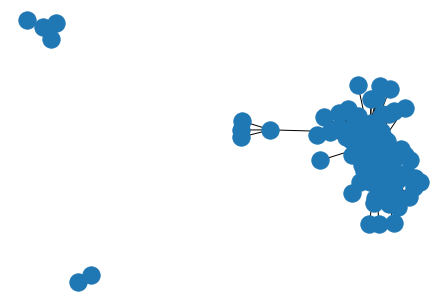

In [400]:
nx.draw(cosimNetwork, pos)

In [373]:
minn = dotsimDF['weight'].min()
maxx = dotsimDF['weight'].max()
dotsimDF['weight'] = dotsimDF['weight'].apply(lambda x:  (x - minn)/(maxx - minn) * 10)

/var/folders/3g/0q_1cdr55qsgk59qbrs83m78dw2x85/T/ipykernel_14619/3980487604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dotsimDF['weight'] = dotsimDF['weight'].apply(lambda x:  (x - minn)/(maxx - minn) * 10)


In [374]:
dotsimDF['weight'].max()


10.0

In [283]:
book.suspects

{'John Bailey': ['john', 'jack'],
 'Gertrude Innes': ['gertrude'],
 'Halsey Innes': ['halsey']}

In [299]:
book.antagonists.items()

dict_items([('Anne Watson', ['anne', 'watson'])])

In [311]:

summary = generate_word_attributes(book)

summary

{'jamieson': {'type': 'protagonist'},
 'detective': {'type': 'protagonist'},
 'winters': {'type': 'protagonist'},
 'john': {'type': 'suspect'},
 'jack': {'type': 'suspect'},
 'gertrude': {'type': 'suspect'},
 'halsey': {'type': 'suspect'},
 'anne': {'type': 'antagonist'},
 'watson': {'type': 'antagonist'}}

In [325]:
nx.set_node_attributes(dotsimNetwork, summary)


In [327]:
dotsimNetwork.nodes

NodeView(('I', 'afternoon', 'air', 'alex', 'anne', 'armstrong', 'arnold', 'ask', 'aunt', 'away', 'bad', 'bailey', 'bank', 'bed', 'begin', 'believe', 'black', 'body', 'boy', 'break', 'bring', 'car', 'carrington', 'casanova', 'chair', 'child', 'circular', 'close', 'clothe', 'club', 'come', 'country', 'course', 'd', 'day', 'dead', 'death', 'detective', 'doctor', 'door', 'drive', 'drop', 'east', 'end', 'evening', 'eye', 'face', 'fall', 'family', 'far', 'feel', 'find', 'fire', 'floor', 'foot', 'gertrude', 'girl', 'good', 'grow', 'half', 'hall', 'halsey', 'hand', 'happen', 'head', 'hear', 'hold', 'home', 'house', 'ill', 'inne', 'jack', 'jamieson', 'know', 'leave', 'let', 'liddy', 'lie', 'light', 'like', 'link', 'little', 'lock', 'lodge', 'long', 'look', 'louise', 'low', 'lucien', 'man', 'minute', 'miss', 'moment', 'money', 'morning', 'mother', 'mr', 'mrs', 'new', 'night', 'nt', 'oclock', 'old', 'open', 'paper', 'paul', 'people', 'place', 'probably', 'quiet', 'ray', 'read', 'right', 'road', '

# The Man in the Lower Ten

In [ ]:
book = ProcessedBook(books['The_Man_in_Lower_Ten'])
lemmas = book.lemmas

In [ ]:
' '.join(lemmas[:100])

In [ ]:
book.clean_lines

# The After House

In [ ]:
book = ProcessedBook(books['The_After_House'])
lemmas = book.lemmas

In [ ]:
' '.join(lemmas[:100])

# The Window at the Wide Cat

In [ ]:
book = ProcessedBook(books['The_Window_at_the_White_Cat'])
lemmas = book.lemmas

In [ ]:
' '.join(lemmas[:100])

# The Bat

In [ ]:
book = ProcessedBook(books['The_Bat'])
lemmas = book.lemmas

In [ ]:
' '.join(lemmas[:100])

## Custom Word Embeddings

In [ ]:
# Import word_embeddings lib
import nlp_libs.books.word_embeddings as we

In [ ]:
# custom_embeddings = we.WordEmbeddingsCustom()

## Pretrained Word Embeddings

In [ ]:
# pretrained_embeddings = we.WordEmbeddingsPretrained()

## Compare Vector distances and report similarities using Custom Embeddings

In [ ]:
# Import compare_statistics lib
import nlp_libs.books.compare_statistics as cs

In [ ]:
# cs.my_custom_embeddings_compare_function()

## Compare Vector distances and report similarities using Pretrained Embeddings

In [ ]:
# cs.my_pretrained_embeddings_compare_function()

## Extra Analysis? Plots?

In [ ]:
# Too much work

In [ ]:
NOTE: lemmatize the stop words then see